In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from grr.pltools import hide_border
from grr.ThresholdModel import constructMedianModel

In [2]:
plt.style.use(os.path.join('..', '..', 'figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
plt.rc('text', usetex = False)
IMG_PATH = os.path.join('..', '..', 'figs', 'ims', 'GIF_individuals')

In [3]:
MODEL_PATH = os.path.join('..', '..', 'data', 'models')

In [4]:
models = {}
for celltype in ['GABA', '5HT', 'mPFC']:
    models[celltype] = {}
    for modtype in ['GIFs', 'AugmentedGIFs']:
        with open(os.path.join(MODEL_PATH, celltype, '_'.join([celltype, modtype]) + '.lmod'), 'rb') as f:
            models[celltype][modtype] = pickle.load(f)

In [5]:
mod_params = {
    'celltype': [],
    'modtype': [],
    'gl': [],
    'El': [],
    'C': [],
    'Vt_star': [],
    'DV': [],
    'gbar_K1': [],
    'h_tau': [],
    'gbar_K2': []
    
}

for celltype in models:
    for modtype in models[celltype]:
        for i in range(len(models[celltype][modtype])):
            mod_params['celltype'].append(celltype)
            mod_params['modtype'].append(modtype)
            for param in mod_params:
                if param in ['celltype', 'modtype']:
                    # Not really a param.
                    continue
                else:
                    mod_params[param].append(getattr(models[celltype][modtype][i], param, np.nan))

mod_params = pd.DataFrame(mod_params)
mod_params.head()

,C,DV,El,Vt_star,celltype,gbar_K1,gbar_K2,gl,h_tau,modtype
0,0.099165,6.537423,-64.456700,-55.723169,5HT,NaN,NaN,0.001101,NaN,GIFs
1,0.121812,4.442023,-80.402978,-54.317823,5HT,NaN,NaN,0.001341,NaN,GIFs
2,0.115125,2.417979,-64.851407,-49.111013,5HT,NaN,NaN,0.002272,NaN,GIFs
3,0.094173,3.813900,-63.565351,-46.181507,5HT,NaN,NaN,0.001654,NaN,GIFs
4,0.105769,4.568117,-54.186544,-59.392968,5HT,NaN,NaN,0.001898,NaN,GIFs


In [6]:
filters = {
    'celltype': [],
    'modtype': [],
    'eta': [],
    'eta_support': [],
    'gamma': [],
    'gamma_support': []
    
}

for celltype in models:
    for modtype in models[celltype]:
        for i in range(len(models[celltype][modtype])):
            filters['celltype'].append(celltype)
            filters['modtype'].append(modtype)
            for filtertype in filters:
                if filtertype in ['celltype', 'modtype'] or 'support' in filtertype:
                    # Not really a param.
                    continue
                else:
                    support, filt_tmp = getattr(models[celltype][modtype][i], filtertype).getInterpolatedFilter(0.1)
                    filters[filtertype].append(filt_tmp)
                    filters[filtertype + '_support'].append(support)

filters = pd.DataFrame(filters)
filters.head()

,celltype,eta,eta_support,gamma,gamma_support,modtype
0,5HT,"[0.09202872049040446, 0.09010048009845284, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[68815.36266977781, 66558.35261970569, 64375.3...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs
1,5HT,"[0.14144367174718175, 0.13859441464493316, 0.1...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[37.57264927693801, 39.43879800369256, 41.2373...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs
2,5HT,"[0.08458377616226719, 0.08475304115679733, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[7.587040581484845, 10.373897844640917, 13.060...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs
3,5HT,"[0.05552815254333769, 0.05583545903964969, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[15.419120659982383, 20.600087732321263, 25.59...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs
4,5HT,"[-0.0016182842158083653, 0.0001901664440403837...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[807.8141910578674, 781.3621068305771, 755.777...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs


IOError: [Errno 2] No such file or directory: '../../figs/ims/GIF_individuals/parameters_5HT.png'

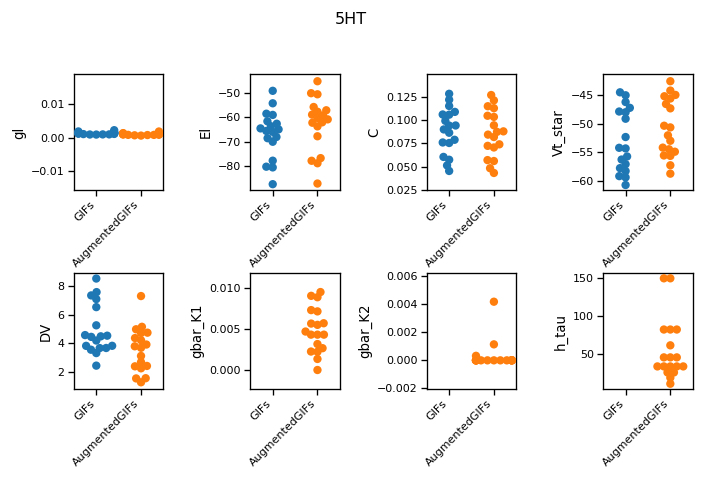

In [7]:
for celltype in filters['celltype'].unique():

    fig, axes = plt.subplots(2, 4, figsize=(6, 4))
    plt.suptitle(celltype)
    
    axes = axes.flatten()
    
    for i, param in enumerate(['gl', 'El', 'C', 'Vt_star', 'DV', 'gbar_K1', 'gbar_K2', 'h_tau']):
        chart = sns.swarmplot(
            x='modtype', 
            y=param, 
            data=mod_params.loc[mod_params['celltype'] == celltype, :],
            ax=axes[i]
        )
        axes[i].set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
        axes[i].set_xlabel('')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    if IMG_PATH is not None:
        plt.savefig(os.path.join(IMG_PATH, 'parameters_{}.png'.format(celltype)))

    plt.show()

In [10]:
for celltype in mod_params['celltype'].unique():
    print(mod_params.groupby(['celltype', 'modtype']).mean())

                               C        DV         El    Vt_star   gbar_K1  \
celltype modtype                                                             
5HT      AugmentedGIFs  0.085585  3.549164 -62.803847 -50.716033  0.004875   
         GIFs           0.088547  4.933249 -66.710486 -52.947200       NaN   
GABA     AugmentedGIFs  0.064210  3.200808 -61.678275 -61.030917  0.002341   
         GIFs           0.065257  4.012611 -63.832641 -63.935129       NaN   
mPFC     AugmentedGIFs  0.151307  3.727081 -72.751981 -67.427300  0.015942   
         GIFs           0.143992  3.585065 -73.624882 -69.647311       NaN   

                         gbar_K2        gl      h_tau  
celltype modtype                                       
5HT      AugmentedGIFs  0.000314  0.001097  54.722222  
         GIFs                NaN  0.001369        NaN  
GABA     AugmentedGIFs  0.001311  0.002135  32.857143  
         GIFs                NaN  0.002347        NaN  
mPFC     AugmentedGIFs  0.005518  0.003

In [11]:
for celltype in mod_params['celltype'].unique():
    print(mod_params.groupby(['celltype', 'modtype']).sem())

                               C        DV        El   Vt_star   gbar_K1  \
celltype modtype                                                           
5HT      AugmentedGIFs  0.005933  0.369486  2.589001  1.191885  0.000641   
         GIFs           0.005724  0.409984  2.275714  1.292502       NaN   
GABA     AugmentedGIFs  0.007732  0.605985  3.452514  2.466725  0.000948   
         GIFs           0.007846  1.036518  3.002986  3.491609       NaN   
mPFC     AugmentedGIFs  0.019737  1.603651  4.164714  5.067412  0.012538   
         GIFs           0.017806  1.077553  2.542892  4.502389       NaN   

                         gbar_K2        gl      h_tau  
celltype modtype                                       
5HT      AugmentedGIFs  0.000237  0.000068   9.597387  
         GIFs                NaN  0.000080        NaN  
GABA     AugmentedGIFs  0.000889  0.000389  13.314809  
         GIFs                NaN  0.000413        NaN  
mPFC     AugmentedGIFs  0.004883  0.000809  19.756167  

# Publication figures

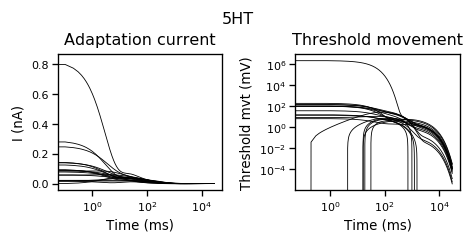

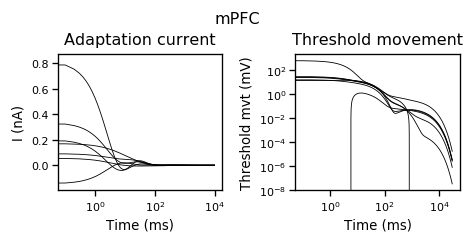

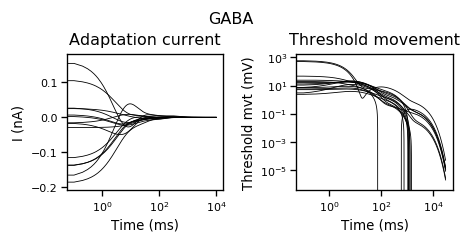

In [8]:
for celltype in filters['celltype'].unique():

    plt.figure(figsize=(4, 2))
    
    plt.suptitle(celltype)

    plt.subplot(121)
    plt.title('Adaptation current')
    plt.semilogx(
        np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'GIFs'), 'eta_support'].tolist()).T,
        np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'GIFs'), 'eta'].tolist()).T,
        'k-'
    )
    #plt.ylim(1e-5, 1.1)
    plt.ylabel('I (nA)')
    plt.xlabel('Time (ms)')

    plt.subplot(122)
    plt.title('Threshold movement')
    plt.loglog(
        np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'GIFs'), 'gamma_support'].tolist()).T,
        np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'GIFs'), 'gamma'].tolist()).T,
        'k-'
    )
    plt.ylabel('Threshold mvt (mV)')
    plt.xlabel('Time (ms)')

    plt.tight_layout()
    plt.subplots_adjust(top=0.80)
    
    if IMG_PATH is not None:
        plt.savefig(os.path.join(IMG_PATH, 'spike_triggered_filters_{}.png'.format(celltype)))

    plt.show()

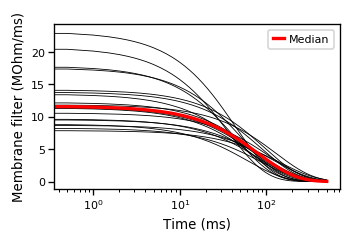

In [9]:
plt.figure()

plt.subplot(111)
for mod in models['5HT']['AugmentedGIFs']:
    t, filt = mod.getInterpolatedMembraneFilter(500, 0.5)

    plt.semilogx(t, filt, 'k-')
    
medmod = constructMedianModel(type(models['5HT']['AugmentedGIFs'][0]), models['5HT']['AugmentedGIFs'])
t, filt = medmod.getInterpolatedMembraneFilter(500, 0.5)
plt.semilogx(t, filt, 'r-', lw=2, label='Median')
    
plt.xlabel('Time (ms)')
plt.ylabel('Membrane filter (MOhm/ms)')
plt.legend()

plt.tight_layout()

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_membrane_filt.png'))

plt.show()

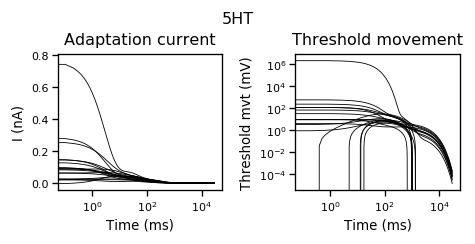

In [17]:
celltype = '5HT'

plt.figure(figsize=(4, 2))
    
plt.suptitle(celltype)

plt.subplot(121)
plt.title('Adaptation current')
plt.semilogx(
    np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'AugmentedGIFs'), 'eta_support'].tolist()).T,
    np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'AugmentedGIFs'), 'eta'].tolist()).T,
    'k-'
)
#plt.ylim(1e-5, 1.1)
plt.ylabel('I (nA)')
plt.xlabel('Time (ms)')

plt.subplot(122)
plt.title('Threshold movement')
plt.loglog(
    np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'AugmentedGIFs'), 'gamma_support'].tolist()).T,
    np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'AugmentedGIFs'), 'gamma'].tolist()).T,
    'k-'
)
plt.ylabel('Threshold mvt (mV)')
plt.xlabel('Time (ms)')

plt.tight_layout()
plt.subplots_adjust(top=0.80)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'pub_spike_triggered_filters_{}.png'.format(celltype)))

plt.show()

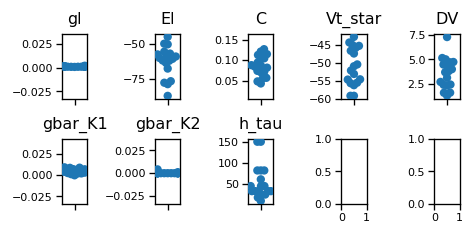

In [16]:
celltype = '5HT'

fig, axes = plt.subplots(2, 5, figsize=(4, 2))

axes = axes.flatten()

for i, param in enumerate(['gl', 'El', 'C', 'Vt_star', 'DV', 'gbar_K1', 'gbar_K2', 'h_tau']):
    chart = sns.swarmplot(
        x='modtype', 
        y=param, 
        data=mod_params.loc[(mod_params['celltype'] == celltype) & (mod_params['modtype'] == 'AugmentedGIFs'), :],
        ax=axes[i]
    )
    ax_title = axes[i].get_ylabel()
    axes[i].set_title(ax_title)
    axes[i].set_ylabel('')
    axes[i].set_xticklabels([])
    axes[i].set_xlabel('')

plt.tight_layout()

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'publication_parameters_{}.png'.format(celltype)))

plt.show()

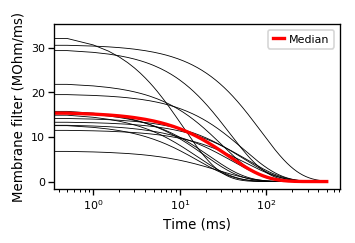

In [11]:
plt.figure()

plt.subplot(111)
for mod in models['GABA']['GIFs']:
    t, filt = mod.getInterpolatedMembraneFilter(500, 0.5)

    plt.semilogx(t, filt, 'k-')

medmod = constructMedianModel(type(models['GABA']['GIFs'][0]), models['GABA']['GIFs'])
t, filt = medmod.getInterpolatedMembraneFilter(500, 0.5)
plt.semilogx(t, filt, 'r-', lw=2, label='Median')
    
plt.xlabel('Time (ms)')
plt.ylabel('Membrane filter (MOhm/ms)')
plt.legend()

plt.tight_layout()

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_membrane_filt.png'))
    
plt.show()

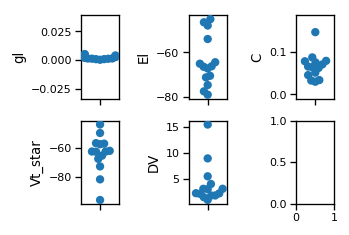

In [12]:
celltype = 'GABA'

fig, axes = plt.subplots(2, 3, figsize=(3, 2))

axes = axes.flatten()

for i, param in enumerate(['gl', 'El', 'C', 'Vt_star', 'DV']):
    chart = sns.swarmplot(
        x='modtype', 
        y=param, 
        data=mod_params.loc[(mod_params['celltype'] == celltype) & (mod_params['modtype'] == 'GIFs'), :],
        ax=axes[i]
    )
    axes[i].set_xticklabels([])
    axes[i].set_xlabel('')

plt.tight_layout()

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'publication_parameters_{}.png'.format(celltype)))

plt.show()